In [1]:
single_process_path = 'Z:\\Sierra\\Incubator Data Pass\\'

# settings that define the files that will be searched for in the load folder above.
# processes indicated below will be run on all such files found. 
subject = ['AO001R','AO008R']
subject_line = ['--',':']

angle = ['temporal', 'nasal', 'superior', 'inferior']
angle_marker = ['o','x','^','s']

eccentricity = ['1.5', '3.5', '4', '4.5', '10']

conetype = ['L', 'M', 'S'] # ['all','L','M','S','unclassed'] #  ['all','L','M','S','unclassed']
conetype_color = ['r', 'g', 'b'] # ['y','r','g','b','w']

coord_unit = 'pixels' # units of the coordinate data loaded in - any string you want

#visualize_intracone_dist_hist = [['L'],['M'],['S']]

visualize_intracone_dist_hist = [] #[['S','1.5'],['S', '3.5','4']]
visualize_MCU_normed_intracone_dist_hist = [['AO001R','AO008R', 'S', '1.5'], 
                                            ['AO001R','AO008R', 'S', '3.5', '4', '4.5'],
                                            ['AO001R','AO008R', 'S', '10'],
                                            ['AO001R','AO008R', 'M', '1.5'], 
                                            ['AO001R','AO008R', 'M', '3.5', '4', '4.5'],
                                            ['AO001R','AO008R', 'M', '10'],
                                            ['AO001R','AO008R', 'L', '1.5'], 
                                            ['AO001R','AO008R', 'L', '3.5', '4', '4.5'],
                                            ['AO001R','AO008R', 'L', '10'],
                                            ['AO001R', 'S', '1.5'], 
                                            ['AO001R', 'S', '3.5', '4', '4.5'],
                                            ['AO001R', 'S', '10'],
                                            ['AO001R', 'M', '1.5'], 
                                            ['AO001R', 'M', '3.5', '4', '4.5'],
                                            ['AO001R', 'M', '10'],
                                            ['AO001R', 'L', '1.5'], 
                                            ['AO001R', 'L', '3.5', '4', '4.5'],
                                            ['AO001R', 'L', '10'],
                                            ['AO008R', 'S', '1.5'], 
                                            ['AO008R', 'S', '3.5', '4', '4.5'],
                                            ['AO008R', 'S', '10'],
                                            ['AO008R', 'M', '1.5'], 
                                            ['AO008R', 'M', '3.5', '4', '4.5'],
                                            ['AO008R', 'M', '10'],
                                            ['AO008R', 'L', '1.5'], 
                                            ['AO008R', 'L', '3.5', '4', '4.5'],
                                            ['AO008R', 'L', '10']]
                                            

import numpy as np
import matplotlib.pyplot as plt
from scipy import spatial
import os
import h5py
import importlib
import glob
import yaml
import sys

import mosaic_topog.utilities as util
import mosaic_topog.flsyst as flsyst
import mosaic_topog.show as show
import mosaic_topog.calc as calc
import mosaic_topog.singleMosaicProcesses as smp

category = ['subject', 'angle', 'eccentricity', 'conetype', 'conetype_color']

category_data = {}
for cat in category:
    category_data[cat] = locals()[cat]

user_param_keys = [
              'subject',
              'subject_line',
              'angle',
              'angle_marker',
              'eccentricity',
              'conetype',
              'conetype_color',
              'coord_unit',
              'category_data'
             ]

wait_list = [
            'mosaic',
            'fl_name',
            'index',
            ]

user_param = dict.fromkeys(user_param_keys)

# most of these parameters have been set directly by the user, 
# a few need to be interpreted from the filesystem, however. 
for p in user_param:
    user_param[p] = locals()[p]

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [2]:
importlib.reload(flsyst)
importlib.reload(smp)
importlib.reload(calc)
importlib.reload(show)

<module 'mosaic_topog.show' from 'c:\\users\\schle\\documents\\github\\incubator-2022-geometry-of-color\\mosaic_topog\\mosaic_topog\\show.py'>

In [3]:
# view intracone dist hists by subject
mosaic, fl_name, index = flsyst.getFilesByDataGroup(single_process_path, user_param, '.hdf5')

print(fl_name)

['AO001R_temporal_1.5_L.hdf5', 'AO001R_temporal_1.5_M.hdf5', 'AO001R_temporal_1.5_S.hdf5', 'AO001R_temporal_3.5_L.hdf5', 'AO001R_temporal_3.5_M.hdf5', 'AO001R_temporal_3.5_S.hdf5', 'AO001R_temporal_4_L.hdf5', 'AO001R_temporal_4_M.hdf5', 'AO001R_temporal_4_S.hdf5', 'AO001R_temporal_4.5_L.hdf5', 'AO001R_temporal_4.5_M.hdf5', 'AO001R_temporal_4.5_S.hdf5', 'AO001R_temporal_10_L.hdf5', 'AO001R_temporal_10_M.hdf5', 'AO001R_temporal_10_S.hdf5', 'AO001R_nasal_1.5_L.hdf5', 'AO001R_nasal_1.5_M.hdf5', 'AO001R_nasal_1.5_S.hdf5', 'AO001R_nasal_3.5_L.hdf5', 'AO001R_nasal_3.5_M.hdf5', 'AO001R_nasal_3.5_S.hdf5', 'AO001R_nasal_4_L.hdf5', 'AO001R_nasal_4_M.hdf5', 'AO001R_nasal_4_S.hdf5', 'AO001R_nasal_4.5_L.hdf5', 'AO001R_nasal_4.5_M.hdf5', 'AO001R_nasal_4.5_S.hdf5', 'AO001R_nasal_10_L.hdf5', 'AO001R_nasal_10_M.hdf5', 'AO001R_nasal_10_S.hdf5', 'AO001R_superior_1.5_L.hdf5', 'AO001R_superior_1.5_M.hdf5', 'AO001R_superior_1.5_S.hdf5', 'AO001R_superior_3.5_L.hdf5', 'AO001R_superior_3.5_M.hdf5', 'AO001R_supe

In [4]:
for p in wait_list:
    user_param[p] = locals()[p]

In [5]:
def getFromCat(var, category):
    for cat in category.keys():
        if var in category[cat]:
            return cat, category[cat].index(var)
    if not var:
        return []

In [6]:
def plotSettingsFromIndex(fl_inds_to_get,index,plot_settings):
    settings = {}
    settings['line'] = []
    settings['marker'] = []
    settings['color'] = []
    settings['markersize'] = []

    conetype_color = plot_settings['conetype_color']
    angle_marker = plot_settings['angle_marker']
    subject_line = plot_settings['subject_line']
    ecc_size = plot_settings['ecc_size']

    for fl in fl_inds_to_get:
        settings['color'].append(conetype_color[index['conetype'][fl]])
        settings['marker'].append(angle_marker[index['angle'][fl]])
        settings['line'].append(subject_line[index['subject'][fl]])
        settings['markersize'].append(ecc_size[index['eccentricity'][fl]])

    return settings

In [7]:
def unpackParams(user_param):
    # unpack critical variables 
    category = user_param['category_data']
    coord_unit = user_param['coord_unit']
    fl_name = user_param['fl_name']
    index = user_param['index']
    
    plot_settings = {}
    plot_settings['subject_line'] = user_param['subject_line']
    plot_settings['angle_marker'] = user_param['angle_marker']
    plot_settings['conetype_color'] = user_param['conetype_color']
    plot_settings['ecc_size'] = user_param['eccentricity']
    
    return [category, coord_unit, fl_name, index, plot_settings]

In [8]:
def getFileIndsByVar(process,var_set,category,index):
     #find the files to read the data from
        fl_inds_to_get = {}
        id_str = process + ' '
        for ind, var in enumerate(var_set):
            try:
                cat, ind = getFromCat(var, category) 
            except:
                print('requested var ' + var + ' is not specified by any category')
                
            if ind == 0:
                id_str = id_str + " " + var
            else: 
                id_str = id_str + " + " + var
                
            var_inds = np.nonzero(index[cat]==ind)[0]
            
            if not cat in fl_inds_to_get.keys():
                fl_inds_to_get[cat] = var_inds
            else: 
                fl_inds_to_get[cat] = np.append(fl_inds_to_get[cat], var_inds)
        
        temp = []
        for key in fl_inds_to_get.keys():
            if len(temp) == 0:
                temp = fl_inds_to_get[key]
            else:
                temp = np.intersect1d(temp,fl_inds_to_get[key])

        fl_inds_to_get = temp
        
        return fl_inds_to_get, id_str

In [9]:
def visualizeIntraconeDistHist(variables, user_param):
    proc_lab = 'intracone dist hists'
    process = 'intracone_dist'
    
    [category, coord_unit, fl_name, index, plot_settings] = unpackParams(user_param)

    for var_set in variables:
       
        [fl_inds_to_get, id_str] = getFileIndsByVar(proc_lab, var_set, category, index)
        
        settings = plotSettingsFromIndex(fl_inds_to_get, index, plot_settings)
            
        hists = []
        bin_edges = []
        for fl in fl_inds_to_get:
            with h5py.File(fl_name[fl], 'r') as file:
                bin_edges.append(file[process]['bin_edge'][()])
                hists.append(file[process]['hist'][()])
            
        fig, ax = plt.subplots(1, 1, figsize = [10,10])
        
        for ind, hist in enumerate(hists):
            if hist.shape[0]>2:
                x = bin_edges[ind][1:]/2
                show.line(bin_edges[ind][1:], hists[ind], id_str, ax=ax, 
                          plot_col=settings['color'][ind], 
                          linestyle=settings['line'][ind], 
                          marker=settings['marker'][ind],
                          markersize= 4) #settings['markersize'][ind])
            else:
                print("warning: histogram for " + fl_name[fl] + " has 2 or fewer bins")

In [10]:
visualizeIntraconeDistHist(visualize_intracone_dist_hist, user_param)

In [11]:
def visualizeMCUnormedIntraconeDistance(variables, user_param):
    proc_lab = 'data normed by MCU mean'
    process = 'norm_by_MCU_mean'
    
    [category, coord_unit, fl_name, index, plot_settings] = unpackParams(user_param)

    for var_set in variables:
        [fl_inds_to_get, id_str] = getFileIndsByVar(proc_lab, var_set, category, index)
        
        settings = plotSettingsFromIndex(fl_inds_to_get, index, plot_settings)
        

        
        hists = []
        bin_edges = []
        for fl in fl_inds_to_get:
            with h5py.File(fl_name[fl], 'r') as file:
                bin_edges.append(file[process]['bin_edge'][()])
                hists.append(file[process]['hist'][()])
            
        fig, ax = plt.subplots(1, 1, figsize = [10,10])
        
        for ind, hist in enumerate(hists):
            if hist.shape[0]>2:
                x = bin_edges[ind][1:]/2
                show.line(bin_edges[ind][1:], hists[ind], id_str, ax=ax, 
                          plot_col=settings['color'][ind], 
                          linestyle=settings['line'][ind], 
                          marker=settings['marker'][ind],
                          markersize= 4) #settings['markersize'][ind])
            else:
                print("warning: histogram for " + fl_name[fl] + " has 2 or fewer bins")

C:\Users\schle\AppData\Local\Temp/ipykernel_34408/1422195303.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, figsize = [10,10])


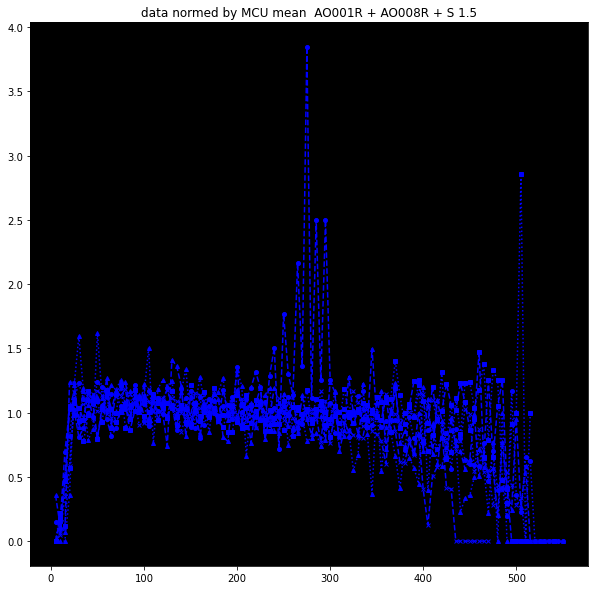

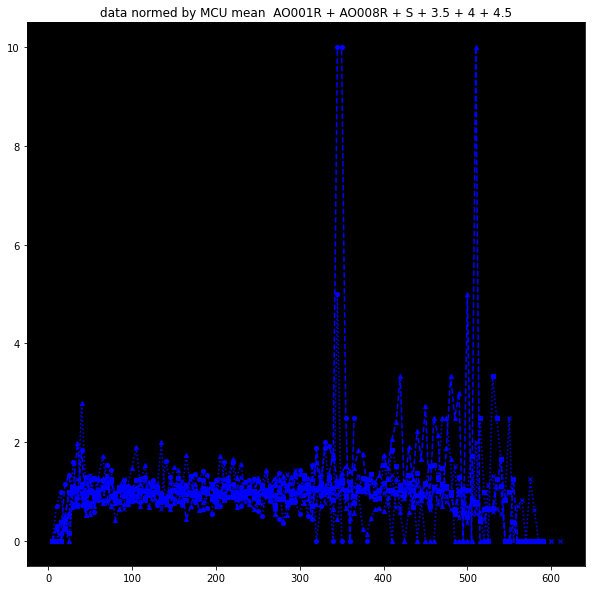

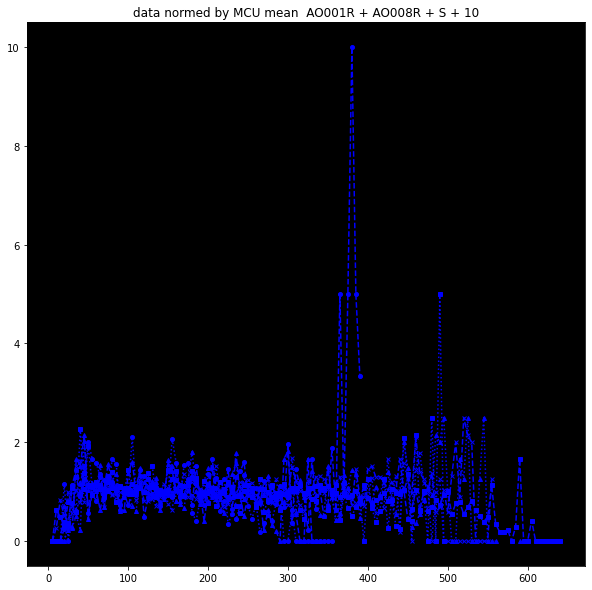

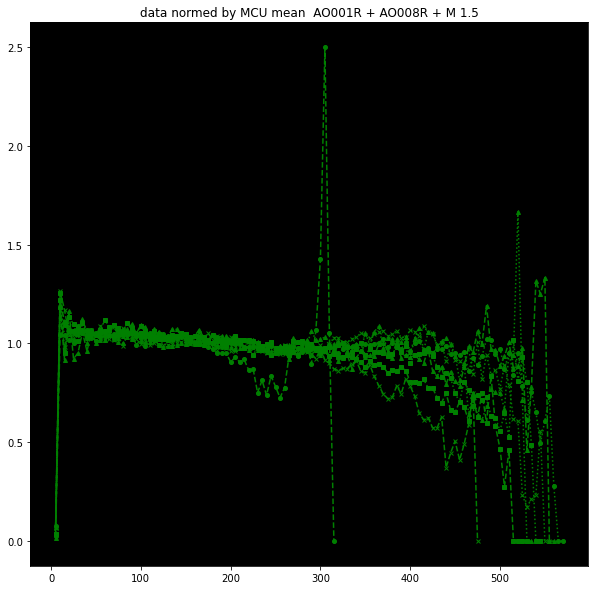

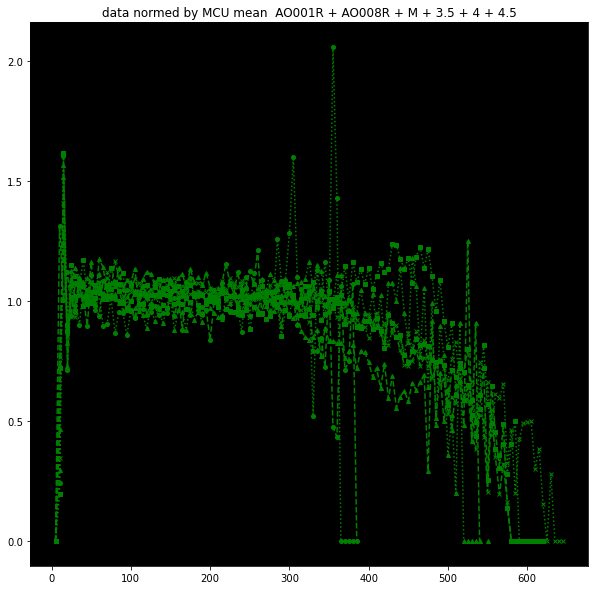

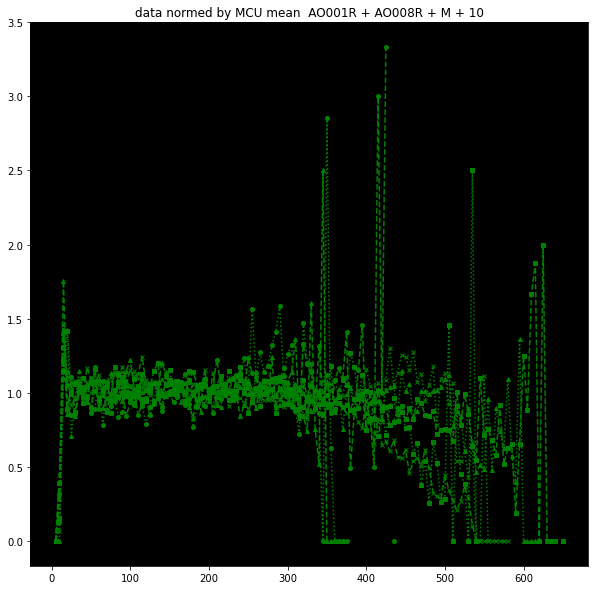

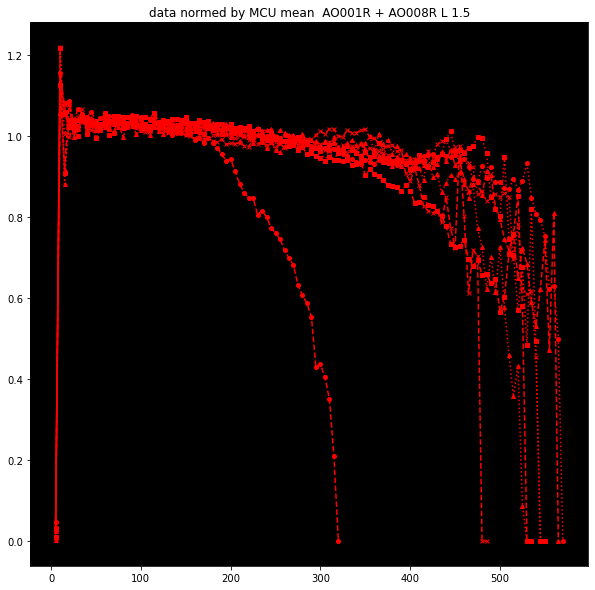

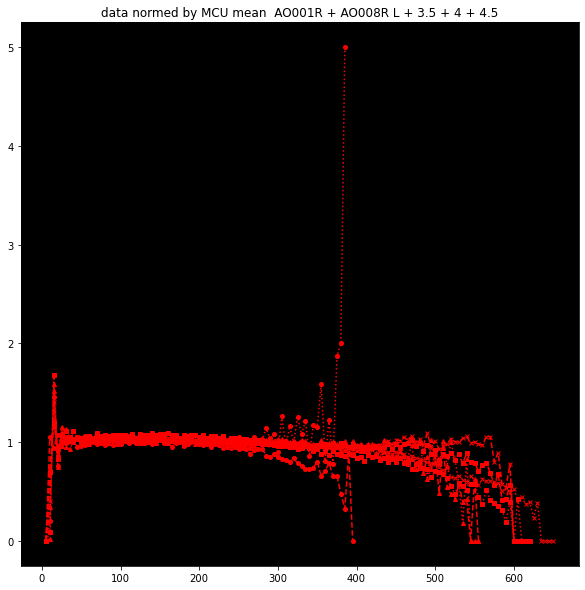

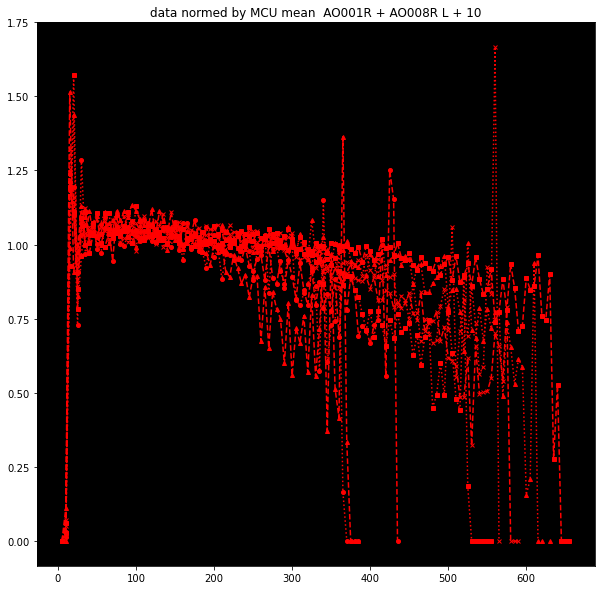

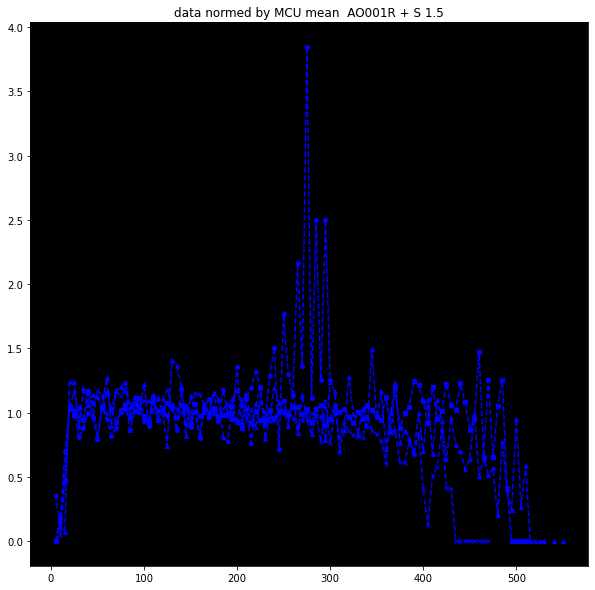

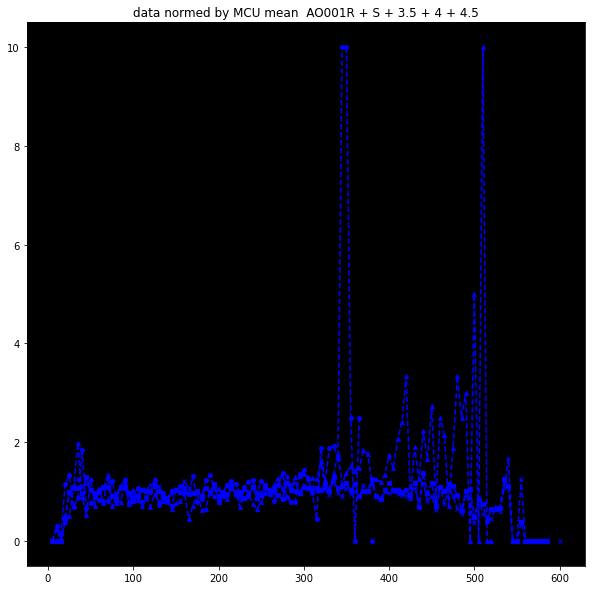

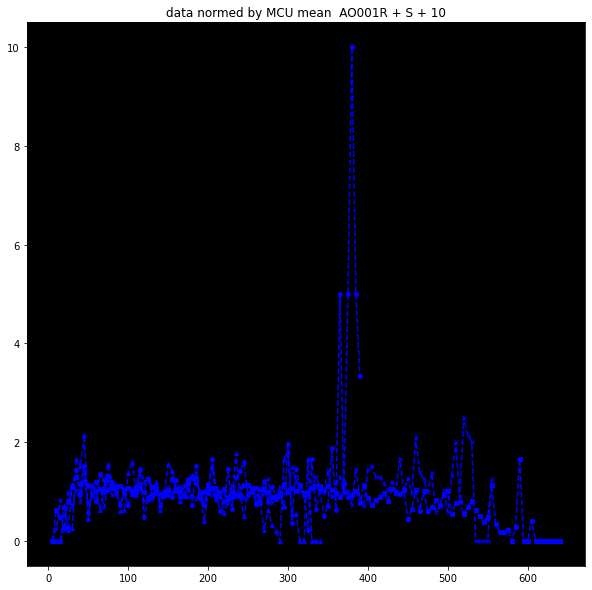

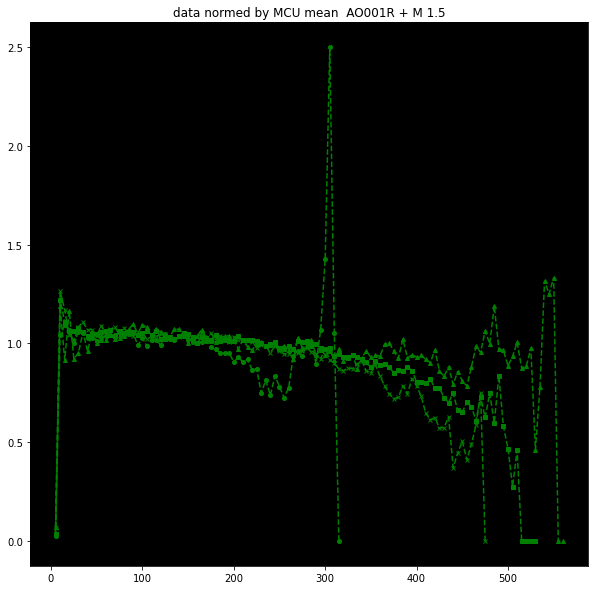

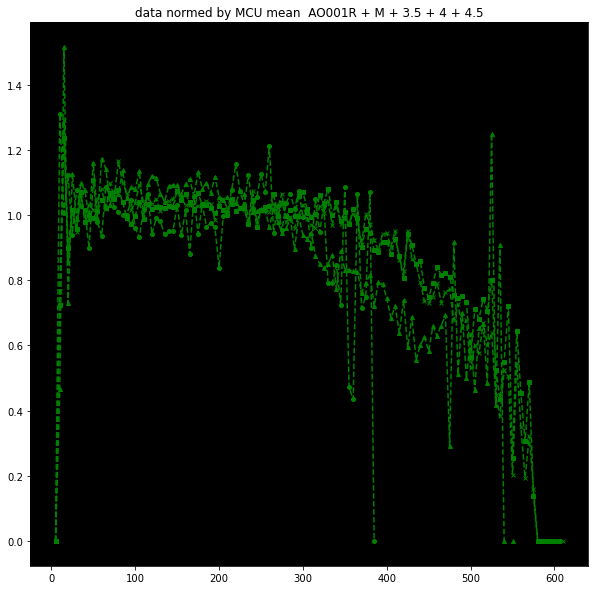

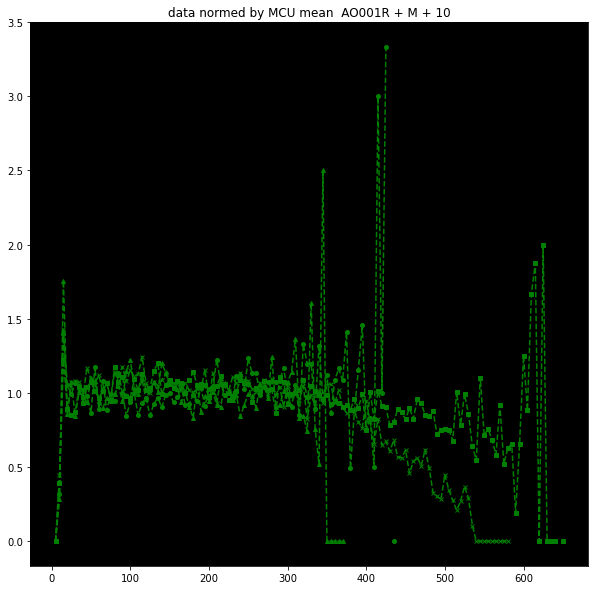

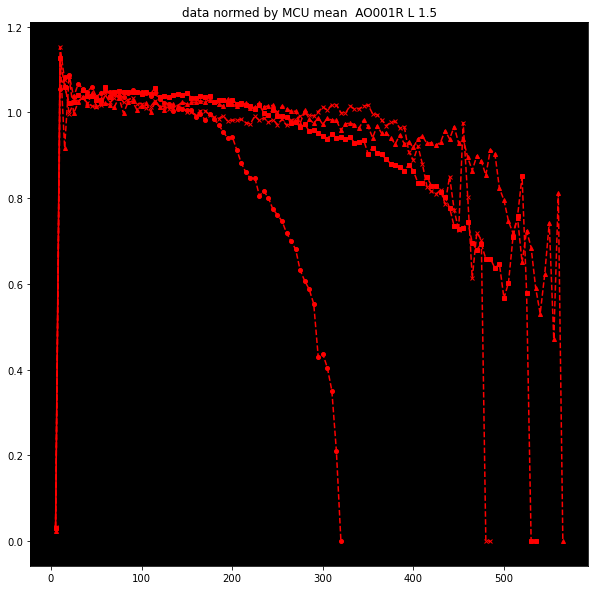

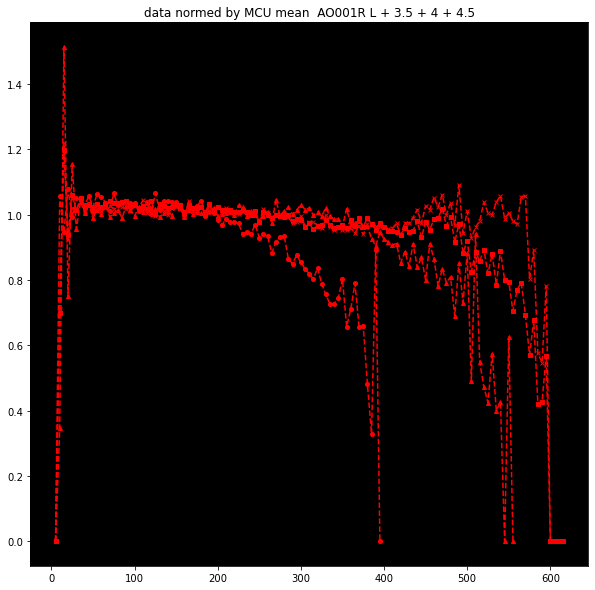

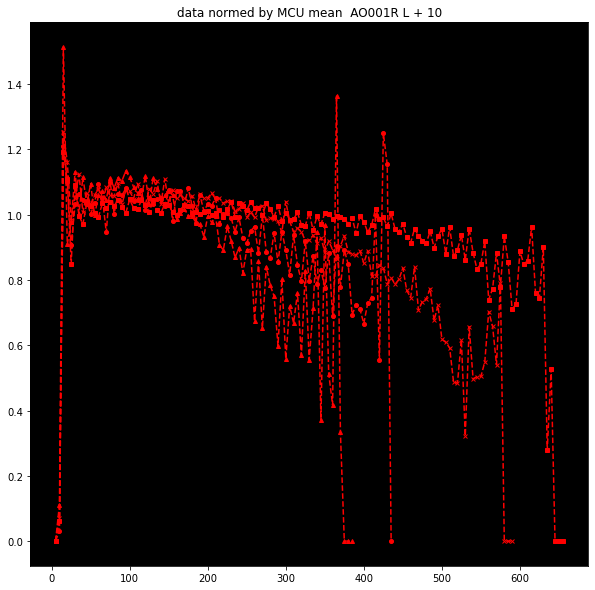

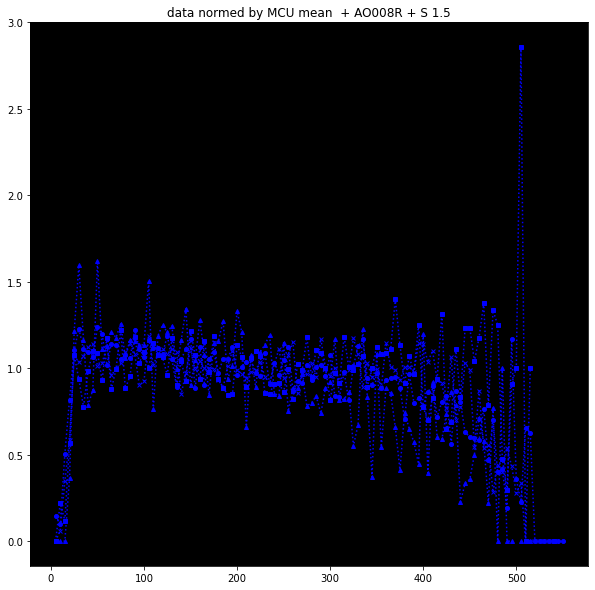

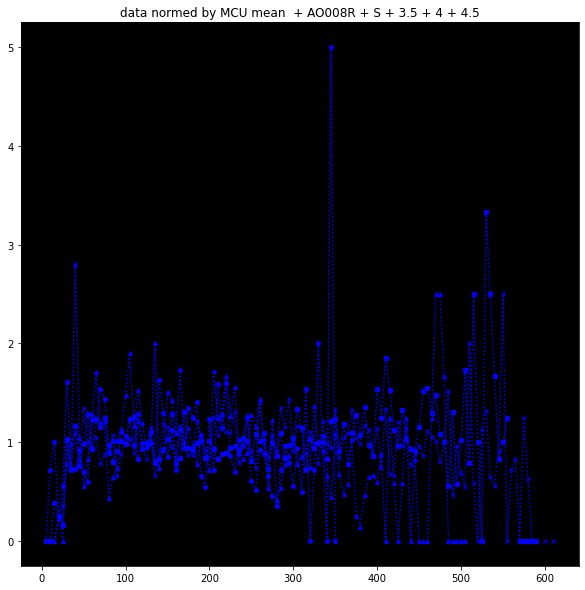

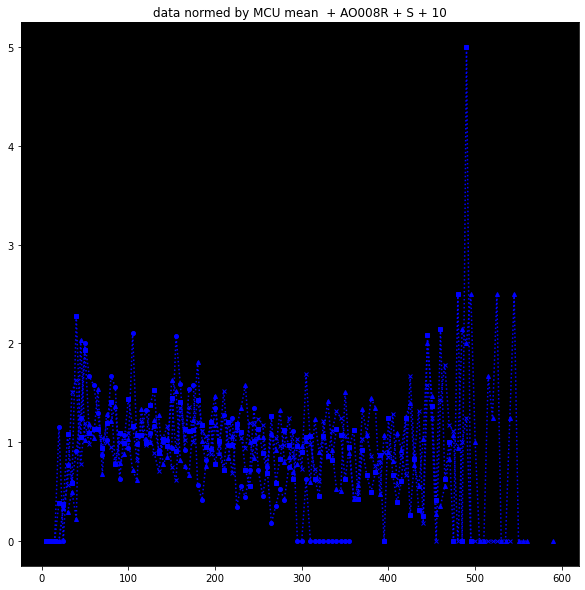

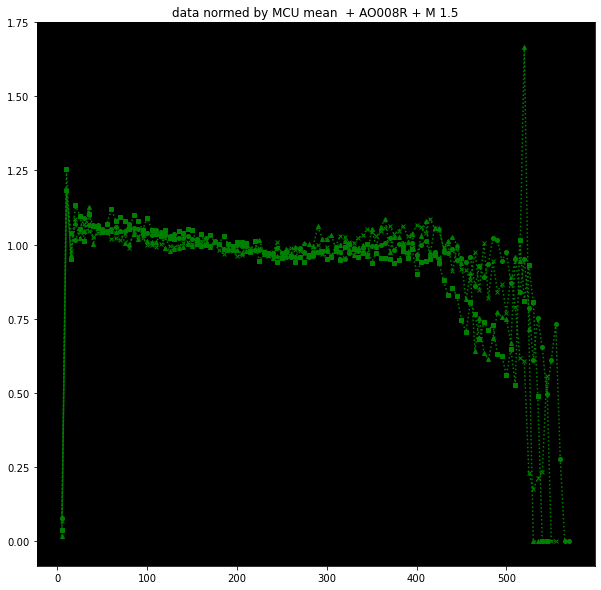

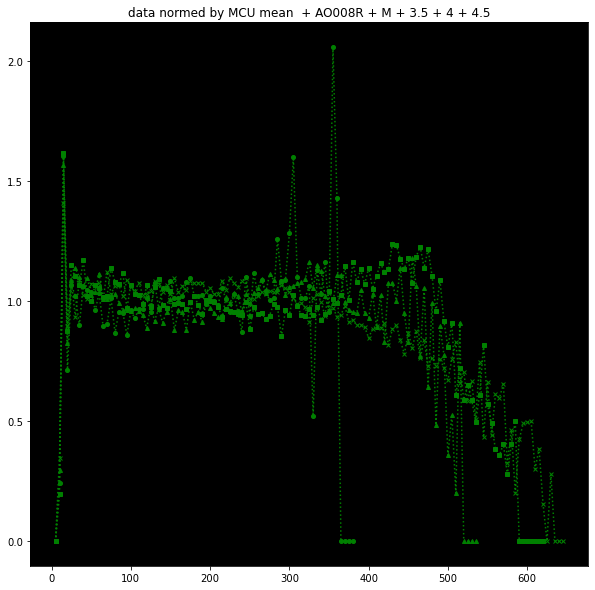

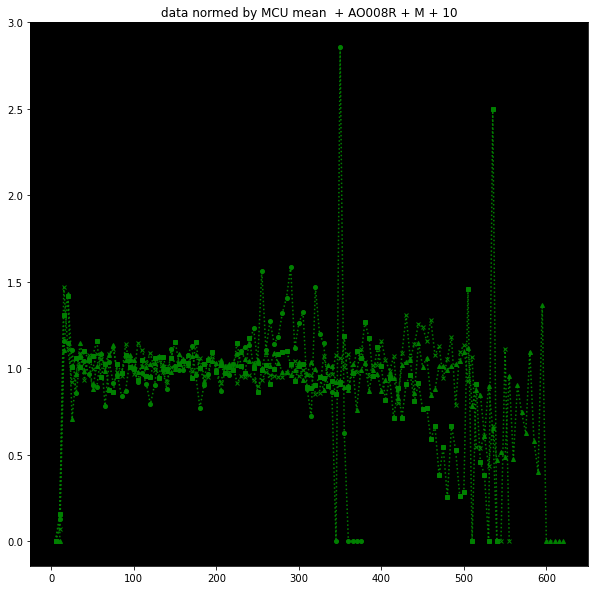

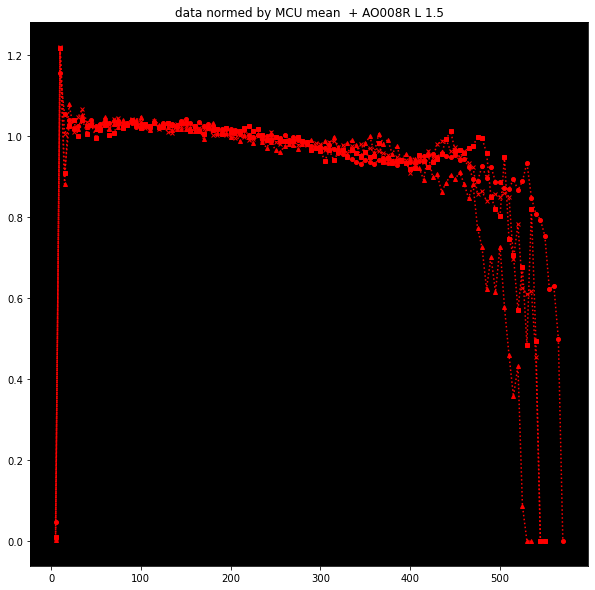

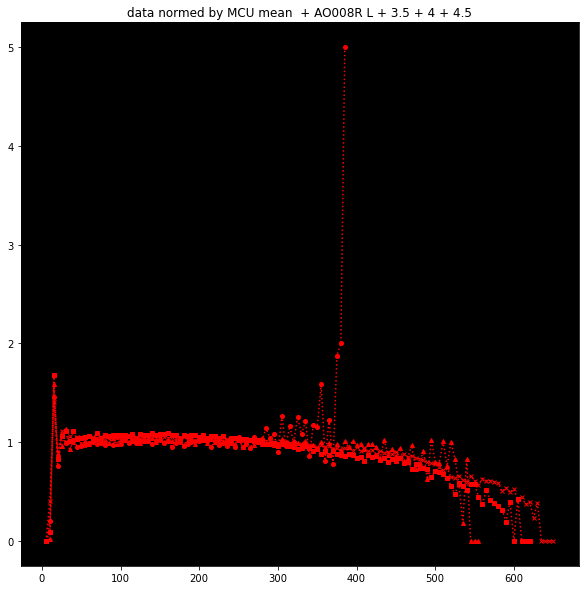

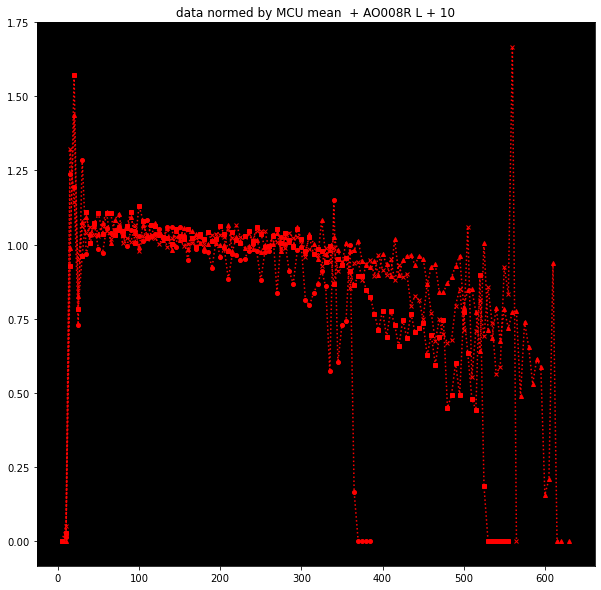

In [12]:
visualizeMCUnormedIntraconeDistance(visualize_MCU_normed_intracone_dist_hist, user_param)

In [25]:
def combineHistDataset(process, fl_inds_to_get):
    #pre-allocating
    separate = {}
    bin_width = {}
    num_sets = {}
    num_bins = {}
    num_cones = {}
    total_hist = []
    total_cones = []
    combined = {}
    mean = {}
    std = {}
    bin_edges = {}
    max_bins = 0
    
    for proc in process:
        separate[proc] = []
        bin_width[proc] = []
        num_sets[proc] = []
        num_bins[proc] = []
        num_cones[proc] = []
        
        #get the data to be combined
        for ind,fl in enumerate(fl_inds_to_get):
            with h5py.File(fl_name[fl], 'r') as file:
                
                #add check that bin_width & num sim are consistent across combined data
                bin_width[proc].append(file['input_data']['bin_width'][()])
                num_cones[proc].append(file['input_data']['cone_coord'][()].shape[0])
                separate[proc].append(file[proc]['hist'][()])
                print(file[proc]['hist'][()].shape)
                
                if separate[proc][ind].ndim == 1:
                    num_sets[proc].append(1)
                    num_bins[proc].append(separate[proc][ind].shape[0])
                else:
                    num_sets[proc].append(separate[proc][ind].shape[0])
                    num_bins[proc].append(separate[proc][ind].shape[1])
                    
        if max(num_bins[proc]) > max_bins:
            max_bins = max(num_bins[proc])
            
        total_hist.append(sum(num_sets[proc]))
        total_cones.append(sum(num_cones[proc]))
    
    for ind,proc in enumerate(process):
        
        #pre-allocating
        combined[proc] = []
        
        #combine the data
        
        #pre allocating
        if num_sets[proc][0] == 1: # real 
            combined[proc] = np.empty((len(fl_inds_to_get),max_bins))
            combined[proc][:] = np.NaN
        elif num_sets[proc][0] > 1 :  # simulated data
            combined[proc] = np.empty((total_hist[ind],max_bins))
            combined[proc][:] = np.NaN
        else:
            print('unexpected histogram shape')
            
        for ind, fl in enumerate(fl_inds_to_get):

            if ind == 0:
                range1 = np.arange(0,num_sets[proc][ind])
            else:
                range1_0 = sum(num_sets[proc][0:ind])
                range1 = np.arange(range1_0, range1_0 + num_sets[proc][ind])

            range2 = np.arange(0,num_bins[proc][ind])
            
            if separate[proc][ind].ndim == 1:
                combined[proc][range1, range2] = separate[proc][ind]
            else:
                #i don't know why the 2D indexing has to be phenominally stupid like this but it errored every other way i could conceive of it
                combined[proc][range1[0]:range1[-1]+1,range2[0]:range2[-1]+1] = separate[proc][ind]

        mean[proc] = np.mean(combined[proc],0)
        std[proc] = np.std(combined[proc],0)
    
    return [combined, mean, std, separate, bin_width, num_sets, num_bins, total_hist, total_cones, max_bins]
            
        

In [26]:
def visualize_MCU_normed_combined(variables, user_param, save_things=False, save_path=''):

    [category, coord_unit, fl_name, index, plot_settings] = unpackParams(user_param)

    process = ['intracone_dist', 'monteCarlo_uniform_intracone_dist', 'monteCarlo_coneLocked_intracone_dist']
    
    proc_lab = 'combined MCU'
    
    plottable = {}
    
    for var_set in variables:
        [fl_inds_to_get, id_str] = getFileIndsByVar(proc_lab, var_set, category, index)
        
        settings = plotSettingsFromIndex(fl_inds_to_get, index, plot_settings)

        [combined, mean, std, separate, bin_width, num_sets, num_bins, total_hist, total_cones, max_bins] = combineHistDataset(process, fl_inds_to_get)
        
        fig, ax = plt.subplots(1, 1, figsize = [10,10])
        
        num_cone = total_cones[0]
        num_mos = total_hist[0]
        
        num_MCU = total_hist[1]
        num_MCL = total_hist[2]
        
        if ' S ' in id_str:
            main_col = 'b'
        elif ' M ' in id_str:
            main_col = 'g'
        elif ' L' in id_str:
            main_col = 'r'
        else:
            print('houston we have a problem')
        
        tit_str = id_str + ', real cones: ' + str(num_cone) + ", real mosaics: " + str(num_mos) + ", MCU: " + str(num_MCU) + ", MCL:" + str(num_MCL)
        
        bin_edge = np.arange(0, (max_bins * bin_width['intracone_dist'][0]) + 1, bin_width['intracone_dist'][0])
        
        MCU_mean = mean['monteCarlo_uniform_intracone_dist']
        real_mean = mean['intracone_dist'] / MCU_mean
        MCL_mean = mean['monteCarlo_coneLocked_intracone_dist'] / MCU_mean
        MCU_std = std['monteCarlo_uniform_intracone_dist'] / MCU_mean
        real_std = std['intracone_dist'] / MCU_mean
        MCL_std = std['monteCarlo_coneLocked_intracone_dist'] / MCU_mean
        MCU_mean = MCU_mean / MCU_mean
        scale_std = 1
        
        if not (real_mean[0] == 1 and np.isnan(real_mean[0])):
            # set up inputs to plot
            xlab = 'distance, ' + user_param['coord_unit']
            ylab = 'bin count (binsize = ' + str(bin_width['intracone_dist'][0])
            x = bin_edge[1:]/2

#             lin_extent = 1.5

#             if showNearestCone:
#                 for lin in cone_rad_x:
#                     if lin == cone_rad_x[0]:
#                         ax = show.line([lin, lin], [-1 * lin_extent, lin_extent], id='cone-dist', plot_col='olive')
#                     else:
#                         ax = show.line([lin, lin], [-1 * lin_extent, lin_extent], id='cone-dist', ax=ax, plot_col='olive')

#                 ax = show.shadyStats(x, MCU_mean, MCU_std, id_str, scale_std=scale_std,
#                                     ax=ax, plot_col='dimgray')
#             else: 

            ax = show.shadyStats(x, MCU_mean, MCU_std, id_str, ax = ax, scale_std=scale_std,
                                    plot_col='dimgray')

            ax = show.shadyStats(x, MCL_mean, MCL_std, id_str, ax=ax, scale_std=scale_std,
                                    plot_col=main_col)

            ax = show.shadyStats(x, real_mean, real_std, id=tit_str, ax=ax, scale_std = scale_std,
                                    plot_col = 'w', xlabel=xlab, ylabel=ylab)
            


            plt.xlim([0, 40])
            plt.ylim([-.25, 2])

            ax.figure

            if save_things:
                savnm = save_path +'combined_data\\'+ id_str + '.png'
                plt.savefig(savnm)
        else:
            print('no')
        
        

(62,)
(86,)
(102,)
(99,)
(107,)
(101,)
(97,)
(107,)
(5, 61)
(5, 95)
(5, 110)
(5, 104)
(5, 111)
(5, 108)
(5, 104)
(5, 110)
(5, 63)
(5, 92)
(5, 109)
(5, 102)
(5, 110)
(5, 107)
(5, 101)
(5, 107)
(73,)
(113,)
(104,)
(113,)
(72,)
(116,)
(99,)
(115,)
(5, 77)
(5, 120)
(5, 107)
(5, 120)
(5, 72)
(5, 123)
(5, 104)
(5, 120)
(5, 74)
(5, 116)
(5, 107)
(5, 118)
(5, 71)
(5, 122)
(5, 103)
(5, 121)
(79,)
(114,)
(65,)
(121,)
(62,)
(103,)
(111,)
(99,)
(5, 78)
(5, 111)
(5, 70)
(5, 131)
(5, 74)
(5, 108)
(5, 118)
(5, 104)
(5, 85)
(5, 115)
(5, 71)
(5, 125)
(5, 66)
(5, 109)
(5, 116)
(5, 99)
(62,)
(94,)
(110,)
(102,)
(112,)
(109,)
(105,)
(107,)
(5, 63)
(5, 95)
(5, 112)
(5, 106)
(5, 115)
(5, 111)
(5, 107)
(5, 109)
(5, 64)
(5, 94)
(5, 112)
(5, 105)
(5, 112)
(5, 109)
(5, 105)
(5, 108)
(78,)
(115,)
(107,)
(115,)
(73,)
(127,)
(103,)
(120,)
(5, 78)
(5, 122)
(5, 110)
(5, 123)
(5, 76)
(5, 129)
(5, 107)
(5, 125)
(5, 78)
(5, 119)
(5, 107)
(5, 119)
(5, 76)
(5, 128)
(5, 109)
(5, 121)
(87,)
(109,)
(70,)
(128,)
(71,)
(110,)

C:\Users\schle\AppData\Local\Temp/ipykernel_34408/142435249.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, figsize = [10,10])


(112,)
(109,)
(105,)
(107,)
(5, 115)
(5, 111)
(5, 107)
(5, 109)
(5, 112)
(5, 109)
(5, 105)
(5, 108)
(73,)
(127,)
(103,)
(120,)
(5, 76)
(5, 129)
(5, 107)
(5, 125)
(5, 76)
(5, 128)
(5, 109)
(5, 121)
(71,)
(110,)
(120,)
(110,)
(5, 75)
(5, 112)
(5, 126)
(5, 110)
(5, 73)
(5, 112)
(5, 123)
(5, 106)
(113,)
(108,)
(105,)
(108,)
(5, 114)
(5, 110)
(5, 107)
(5, 111)
(5, 113)
(5, 109)
(5, 106)
(5, 108)
(78,)
(126,)
(108,)
(121,)
(5, 77)
(5, 130)
(5, 111)
(5, 125)
(5, 78)
(5, 128)
(5, 109)
(5, 121)
(73,)
(112,)
(123,)
(105,)
(5, 77)
(5, 113)
(5, 127)
(5, 112)
(5, 73)
(5, 112)
(5, 123)
(5, 110)


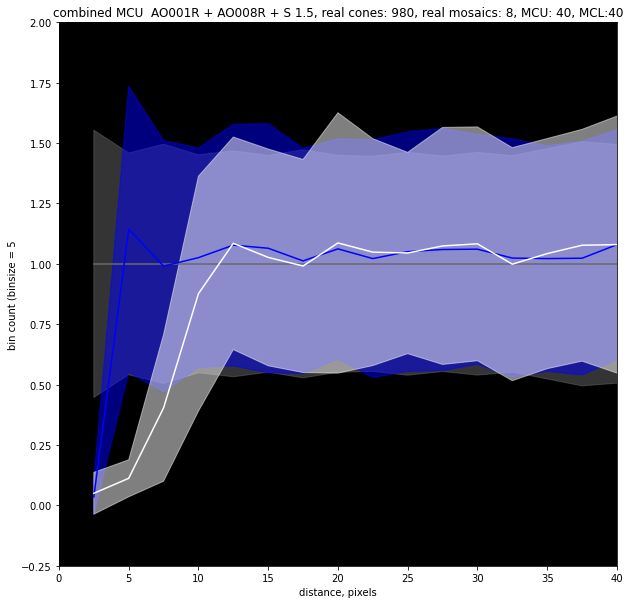

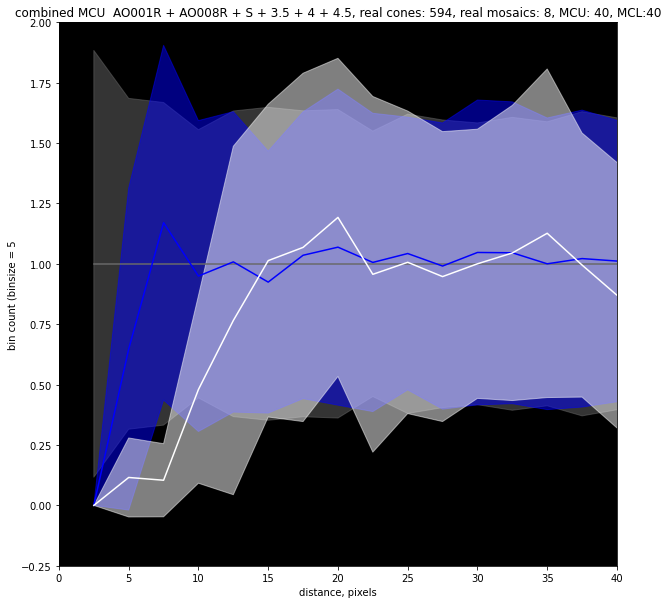

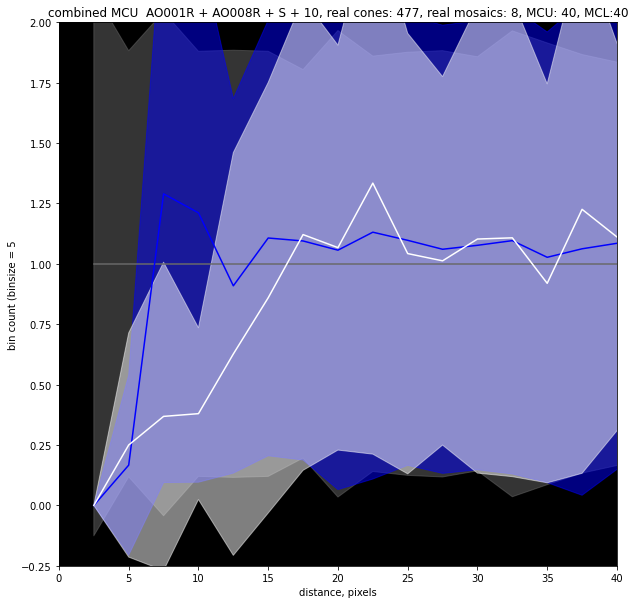

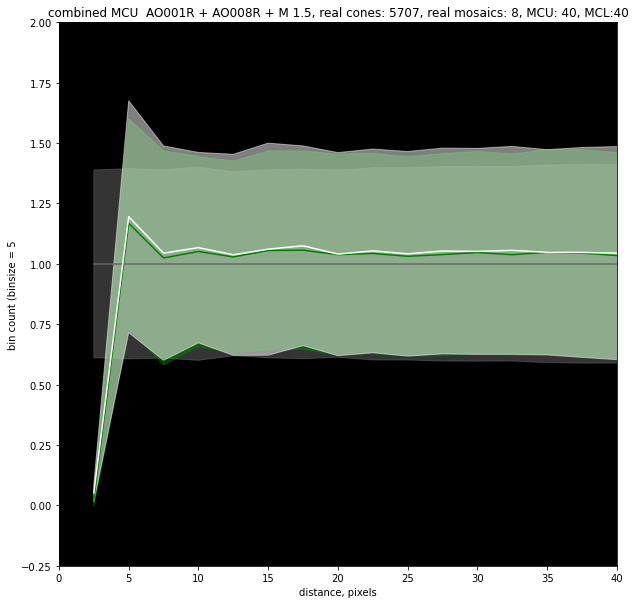

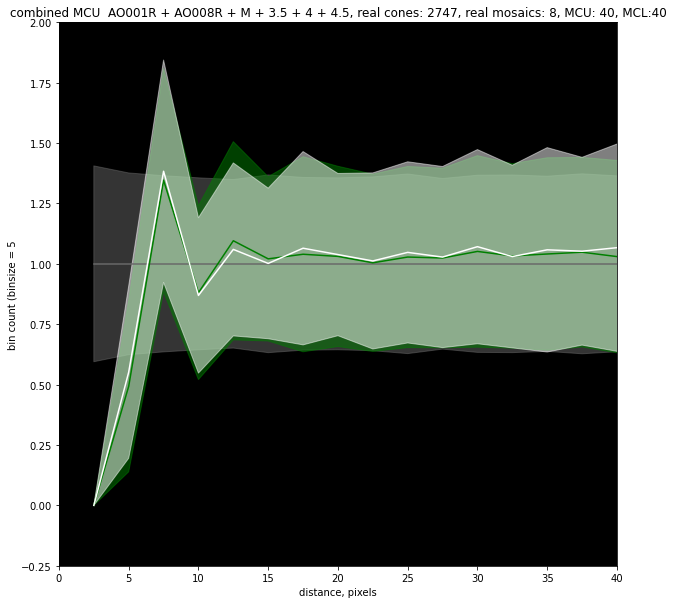

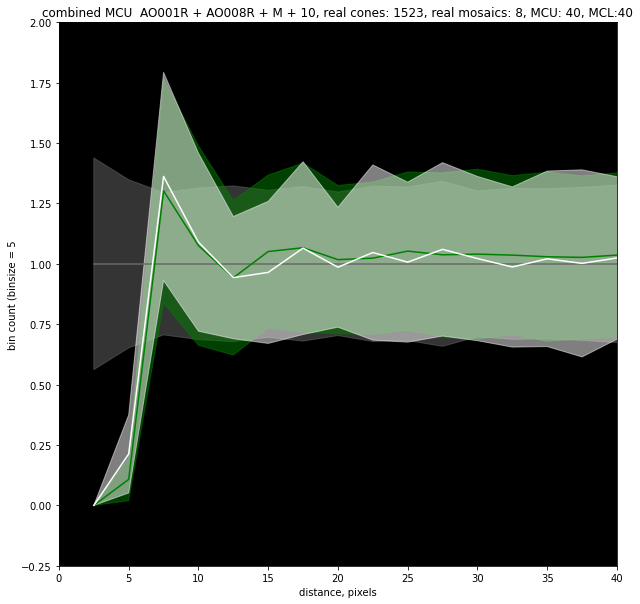

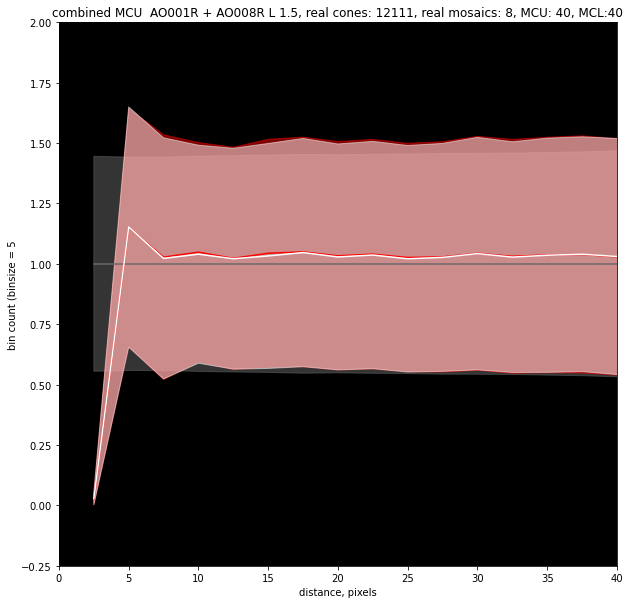

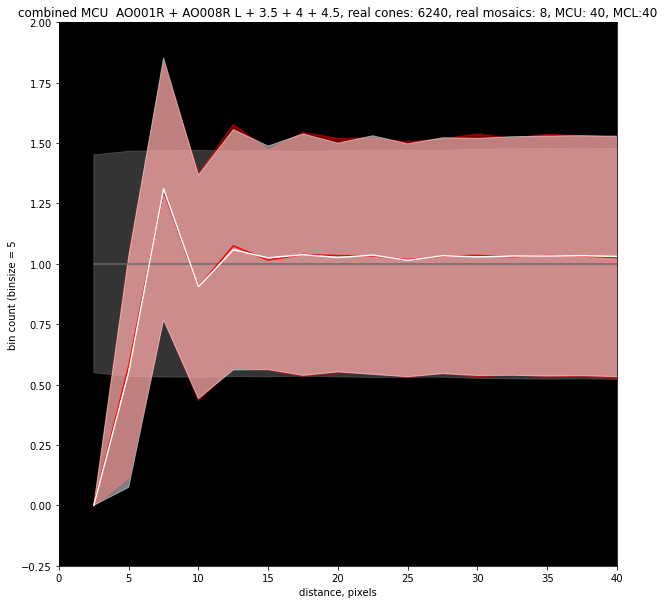

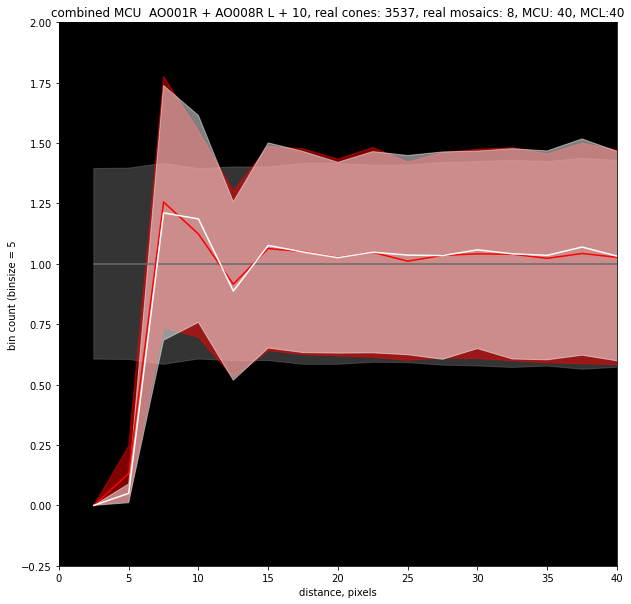

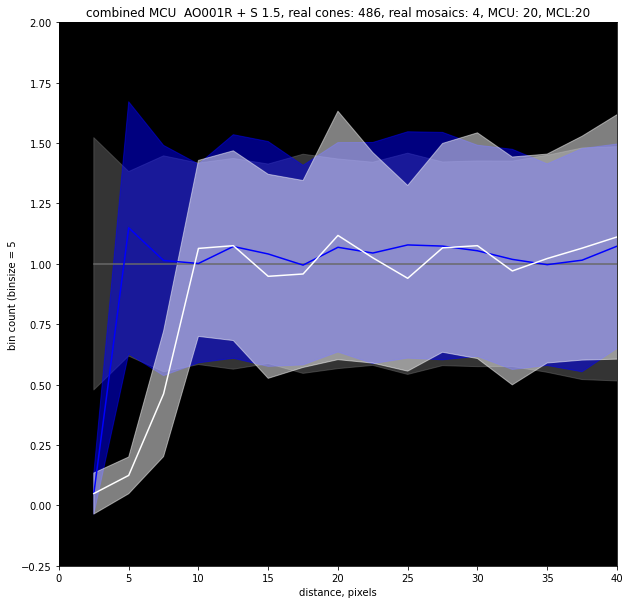

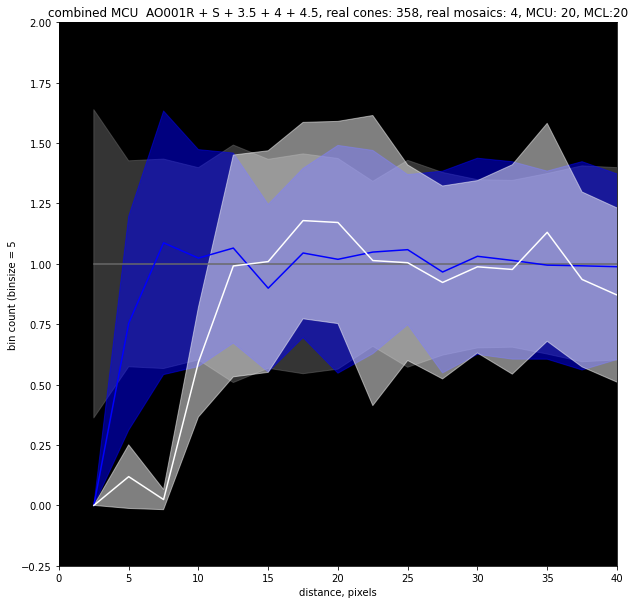

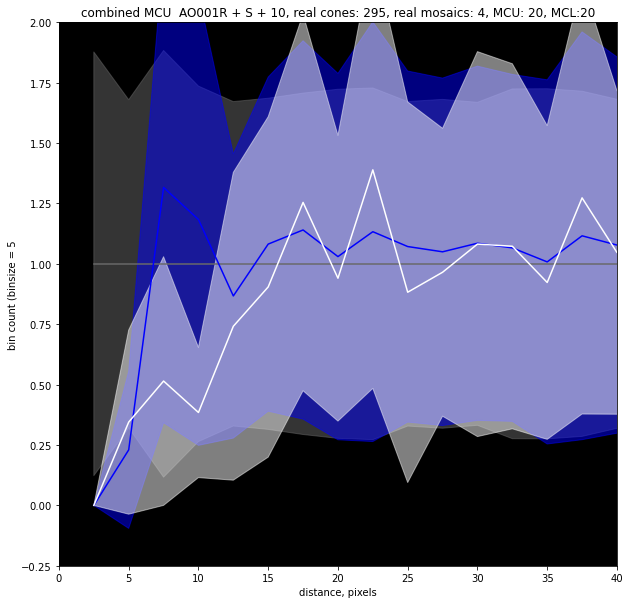

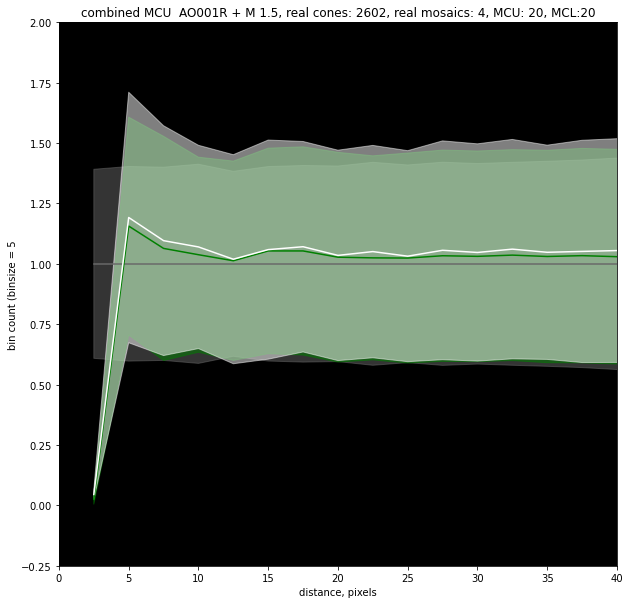

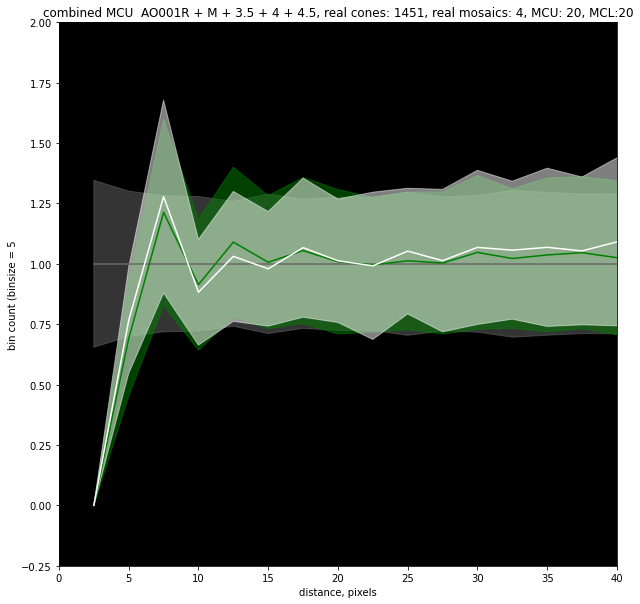

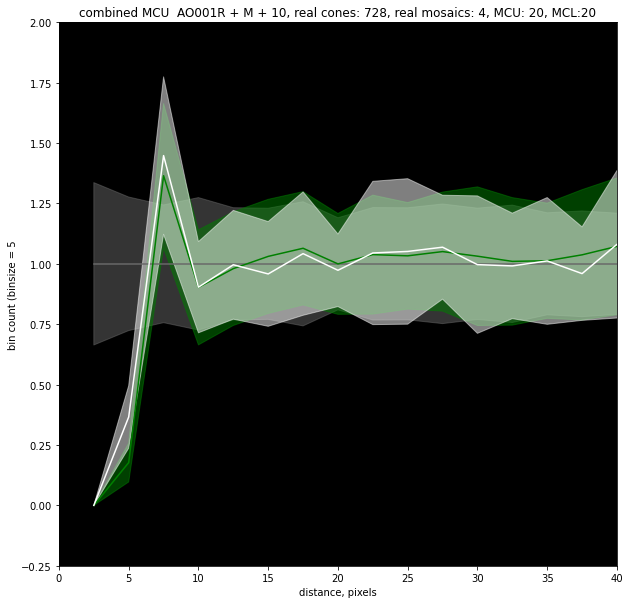

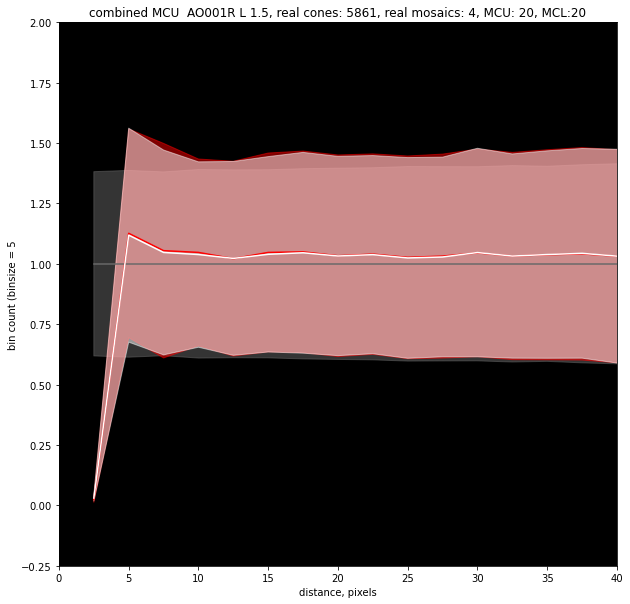

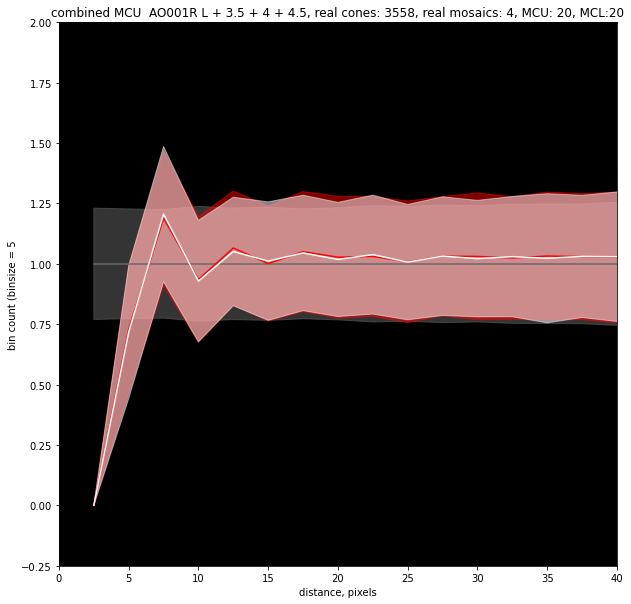

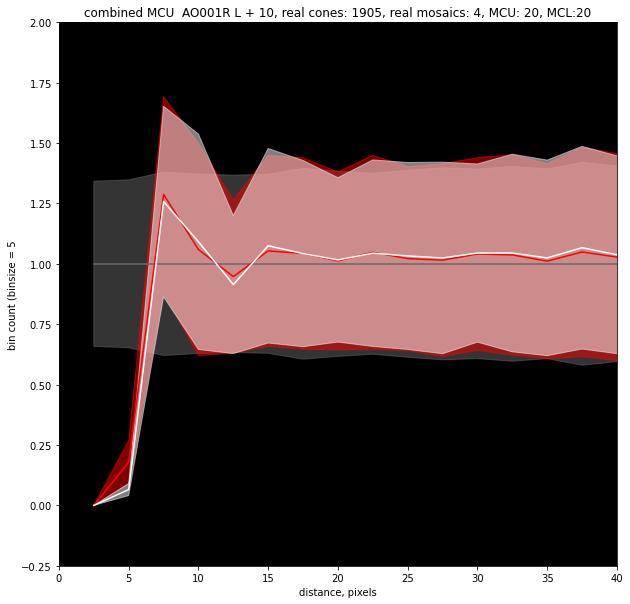

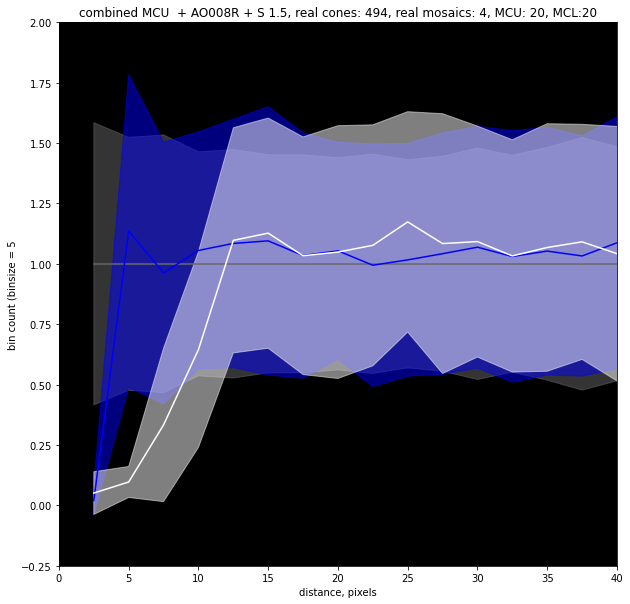

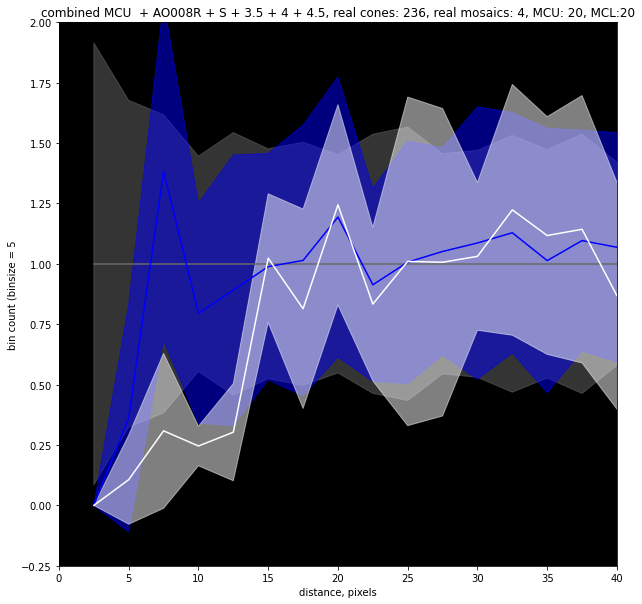

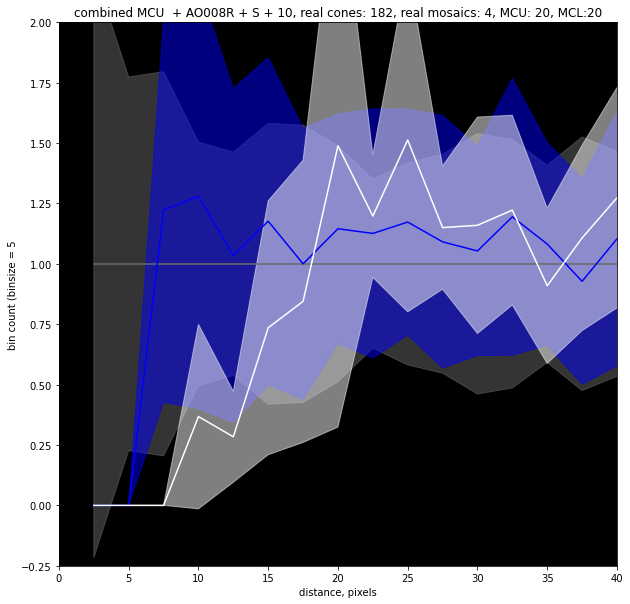

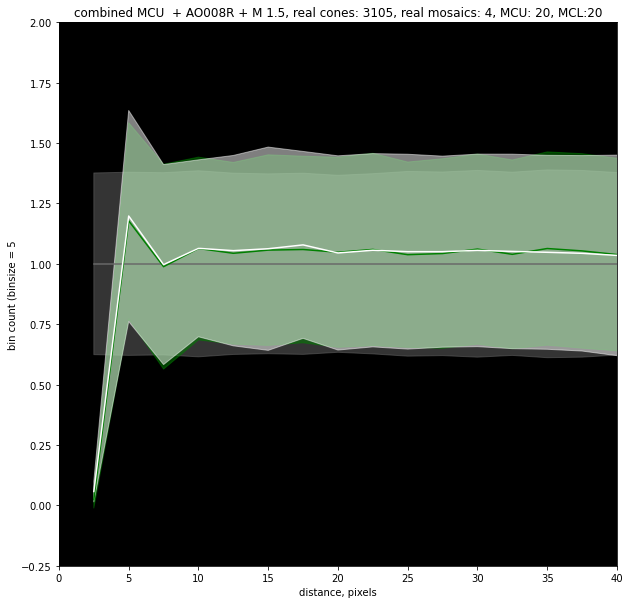

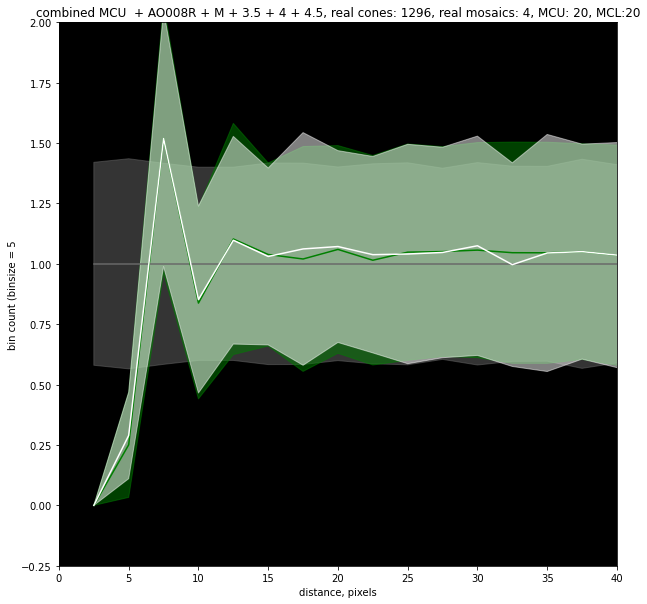

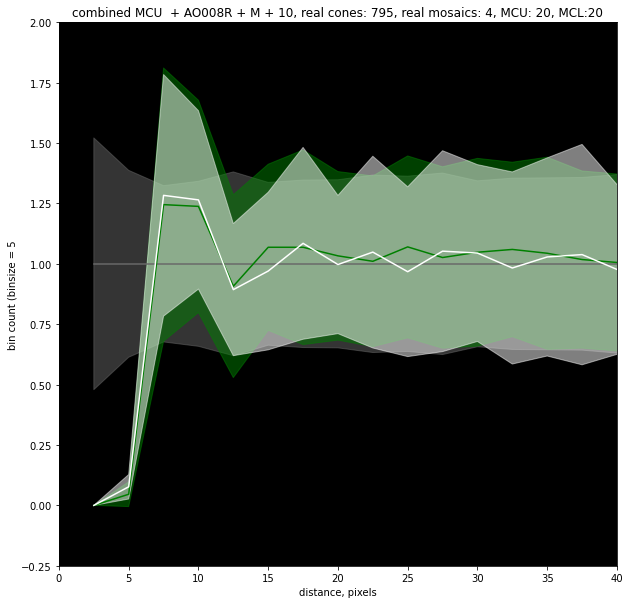

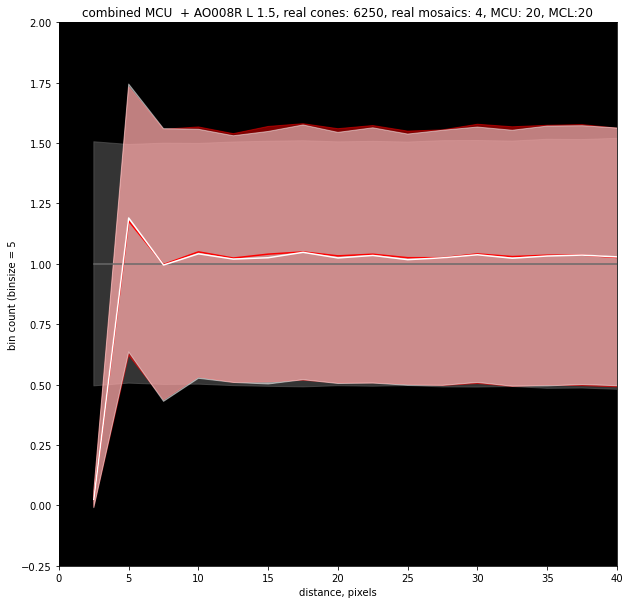

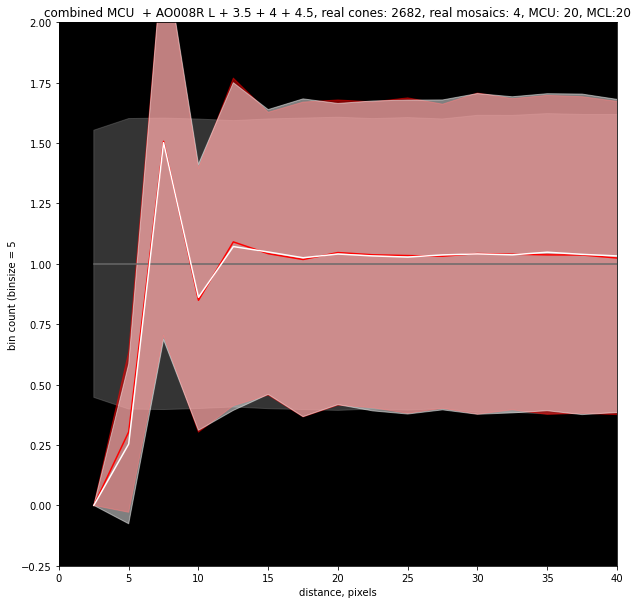

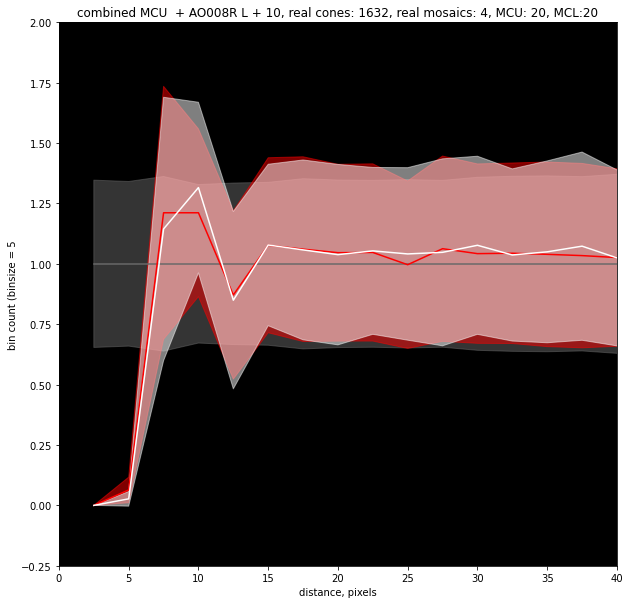

In [27]:
visualize_MCU_normed_combined(visualize_MCU_normed_intracone_dist_hist, user_param, save_things=True, save_path=single_process_path)